# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Questions To explore:
    1. What is the average runtime of all movies?
        1.1 What's the trend for how long the movies usually show in minutes?
    2. What is the relationship between runtime and vote average?
    3. What is the relationship between budget and revenue?
    4. What's the trend for how many movies has been released over the years?
        4.1 What's the maximum and lowest amount of movies released over the years?
    
#### Resources:
Most of the codes i used is based on the lessons, And the things i learned from practice and exercises, As well the links mentioned in the lessons (StackOverFlow) And reading documentation about the libraries like:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

    
## Importing the required Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Loading And Reading the dataset.
tmdb_df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Step 1: Checking data types and rows and columns
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

##### Based on the information here there are 10866 rows and 21 Columns.
##### There is columns that need to be converted to the right data type.

In [3]:
# Step 2: Checking for duplicated rows
tmdb_df.duplicated().sum()

1

##### There is 1 Duplicated row.

In [4]:
# Step 3: Checking for null columns
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

##### There is 9 columns with null values:
    - imdb_id
    - cast
    - homepage
    - director
    - tagline
    - keywords
    - overview
    - genres 
    - production_companies

In [5]:
# Step 4: Checking the dataset
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### Budget and revenue didn't give me which currency they're using which i will assume in USD.

##### There are plenty of Unnecessary Columns i don't need to answer my questions.

## Data Cleaning

##### Steps to be taken:
    1- Dropping Unnecessary Columns.
    2- Dropping Duplicated Rows.
    3- Dropping "0" Values in budget and revenue columns.
    4- Converting the release_date column to a date format.
    5- Changing format of budget and revenue column.

### 1- Data Cleaning (Dropping unnecessary Columns)

##### First let's remove the columns that are not useful for answering our questions.

In [6]:
# List of columns to be deleted
del_col = ['id','imdb_id','popularity','homepage','tagline','keywords','overview','production_companies',
           'vote_count','budget_adj','revenue_adj']
# Dropping the columns
tmdb_df = tmdb_df.drop(del_col, 1)
# Taking a look at the new dataset
tmdb_df.head(3)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015


##### The dataset look's more clean and simple by just looking at the columns that i need and necessary.

### 2- Data Cleaning (Dropping Duplicated Rows)

In [7]:
# Removing duplicated rows
tmdb_df.drop_duplicates(inplace=True)
# Double checking for duplicated rows
tmdb_df.duplicated().sum()

0

##### There are no more duplicated rows

### 3- Data cleaning (Dropping "0" Values in budget and revenue columns)
##### Now we will remove 0 values in budget and revenue from the dataset.

In [8]:
# Column names that will be checked
col_row = ['budget','revenue']
# Replacing "0" Value with NaN
tmdb_df[col_row] = tmdb_df[col_row].replace(0,np.NaN)
# Dropping NaN from the columns rows
tmdb_df.dropna(subset = col_row, inplace=True)
# Taking a look at how many rows and columns
tmdb_df.shape

(3854, 10)

##### There are now 3854 rows instead of 10866 and 10 columns instead of 21

### 4- Data cleaning (Converting the release_date column to a date format)
##### Now let's convert dates to the right format.

In [9]:
# Converting the column to a date format
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
# Printing the new dataset
tmdb_df.head(3)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015


##### The release_date column is now converted to the right format (year-month-day).

### 5- Data Cleaning(Changing format of budget and revenue column)
##### Now we will change budget and revenue column to ints instead of floats.

In [10]:
# Column names that will change
change_type = ['budget','revenue']
# Changing data types
tmdb_df[change_type] = tmdb_df[change_type].applymap(np.int64)
# Printing the new data types
tmdb_df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
dtype: object

##### budget and revenue is now in the right data type.

<a id='eda'></a>
## Exploratory Data Analysis

### 1.What is the average runtime of all movies?

In [11]:
# Creating a function to get the average
def avg_fun(column_name):
    """This function takes the column and get it's average"""
    # Return the average
    return tmdb_df[column_name].mean() 

In [12]:
# Calling the function
avg_fun('runtime')

109.22029060716139

##### The average runtime of all movies is 109 minutes.

### 1.1 What's the trend for how long the movies usually show in minutes?
##### Let's create a visualization and take a look.

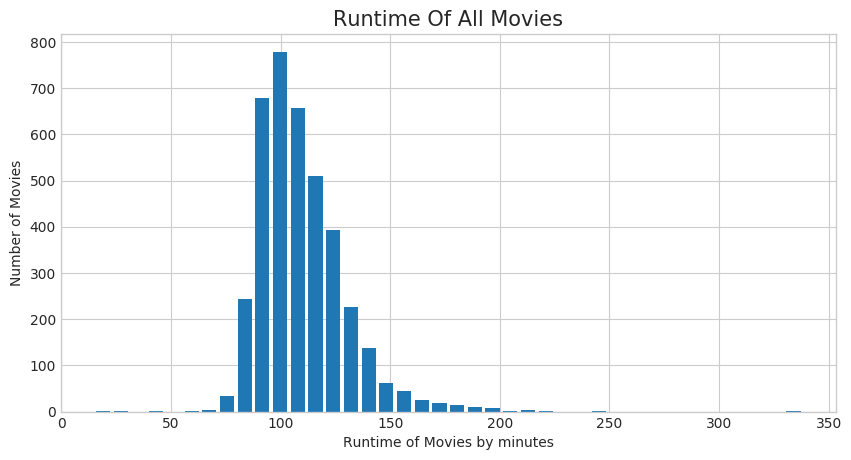

In [13]:
# Plotting a histogram
# Giving a style to the background
sns.set_style('whitegrid')
# Giving a figure size
plt.figure(figsize=(10,5), dpi=100)
# Giving a label name to x,y axis
plt.xlabel('Runtime of Movies by minutes', fontsize=10)
plt.ylabel('Number of Movies', fontsize=10)
# Name of the graph.
plt.title('Runtime Of All Movies', fontsize=15)
# Giving a histogram plot
plt.hist(tmdb_df['runtime'], rwidth=0.8, bins=40)
# Display the plot
plt.show()

##### The above graph show us that most movies are timed between 80 and 115 minutes, And the distribution is right skewed.

### 2.What is the relationship between runtime and vote average?

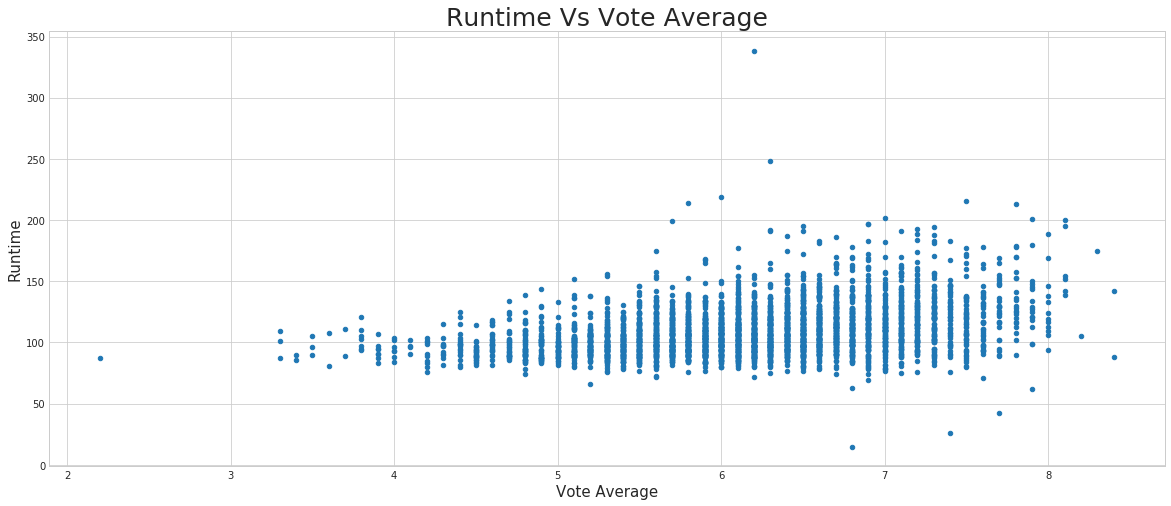

In [14]:
# Plotting a scatter
# Giving the plot the columns and it's kind and figure size
tmdb_df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(20,8))
# Name of the graph.
plt.title('Runtime Vs Vote Average', fontsize=25)
# Giving a label name to x,y axis
plt.xlabel('Vote Average', fontsize=15)
plt.ylabel('Runtime', fontsize=15)
# Display the graph
plt.show()

##### The above graph show's us that movies that is around 110 minutes usually have medium-high rating , As we can see it's hard to predict that a movie that is around 110 minutes gonna have high rating but it has a higher potential to have a medium-high rating.

### 3. What is the relationship between budget and revenue?

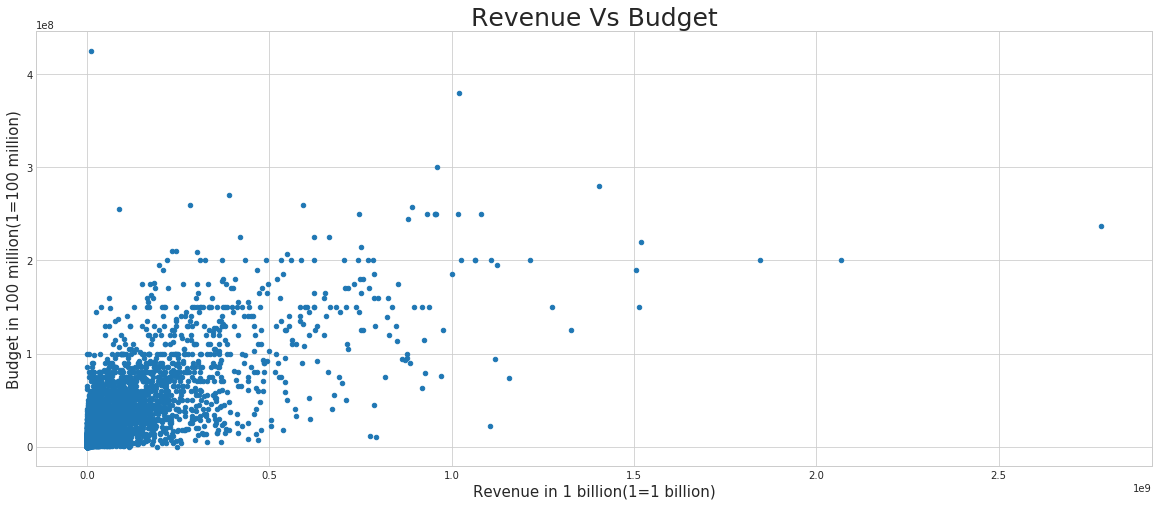

In [15]:
# Plotting a scatter
# Giving the plot the columns and it's kind and figure size
tmdb_df.plot(x='revenue', y='budget', kind='scatter', figsize=(20,8))
# Name of the graph.
plt.title('Revenue Vs Budget', fontsize=25)
# Giving a label name to x,y axis
plt.xlabel('Revenue in 1 billion(1=1 billion)', fontsize=15)
plt.ylabel('Budget in 100 million(1=100 million)', fontsize=15)
# Displaying the graph
plt.show()

##### The above graph show's us that most movies that have a budget less than 100 million usually get a revenue less than 400 million, And movies with more than a budget of 100 million usually get more revenue.

### 4. What's the trend for how many movies has been released over the years?

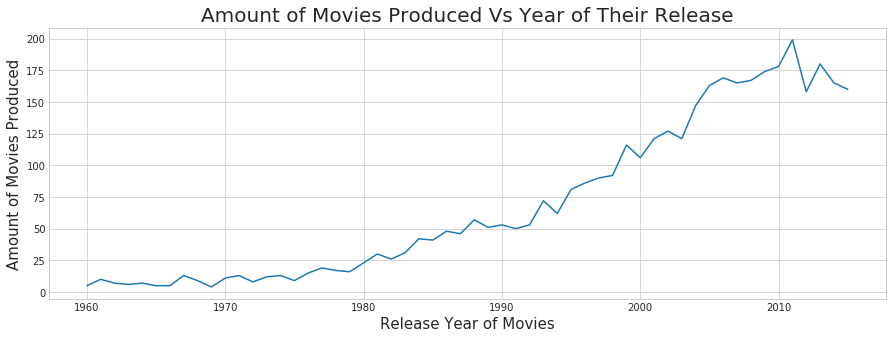

In [16]:
# Summing up all the movies of a year
movies_year = tmdb_df['release_year'].value_counts().sort_index()
# Giving figure size
plt.figure(figsize=(15,5))
# Giving a label name to x,y axis
plt.xlabel('Release Year of Movies', fontsize=15)
plt.ylabel('Amount of Movies Produced', fontsize=15)
# Name of the graph.
plt.title('Amount of Movies Produced Vs Year of Their Release', fontsize=20)
#plotting the graph
plt.plot(movies_year)
# showing the line plot
plt.show()

### Keep in mind that this dataset doesn't include movies with 0 budget and revenue so the data here is not 100% accurate.

##### The above graph show's us that movies that has been released have increased since 1960, Also we can see we had our highest peek in 2013~2014, And the graph is in an up trendline.

### 4.1 What's the maximum and lowest amount of movies released over the years?

In [17]:
# Show which year had the most profit
movies_year.describe()

count     56.000000
mean      68.821429
std       62.576530
min        4.000000
25%       13.000000
50%       49.000000
75%      121.000000
max      199.000000
Name: release_year, dtype: float64

##### The minimum amount of movies released in a year is 4 movies, And the maximum amount of movies release in a year is 199 movies.

<a id='conclusions'></a>
## Conclusions

### Throughout this data analysis, I posed questions and I've come to several conclusions:

##### - Movies usually have a duration for about around 109 minutes.
##### - It's hard to predict that a movie gonna have higher rating from how long the movie is.
##### - Having higher budget doesn't mean you will have a higher revenue but it's have a higher chance of getting a high revenue than have a low budget.
##### - Each year the movies productions is been increased and going in an up trendline.

### Limitations:

##### - This dataset didn't have precise data as it didn't provide which currency it is using for the budget and revenue columns as it could be dollars , rupees , euros, dirhams, etc. Also there is a lot of missing data and values with 0 in budget, revenue and runtime which we had to drop from the data and affected our analysis.

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0